# ANN & MNIST : exercise
---

## 라이브러리 불러오기

In [21]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

## 데이터 불러오기

In [22]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()

In [23]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
train_x[0]

id = 0
다음 그림은 숫자 5 입니다.


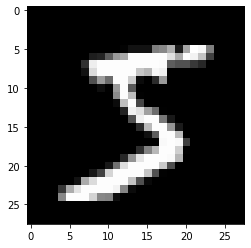

In [24]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

# id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

## 데이터 전처리

* reshape

In [25]:
train_x_re = train_x.reshape((train_x.shape[0], -1))
test_x_re = test_x.reshape((test_x.shape[0], -1))
train_x_re.shape, test_x_re.shape

((60000, 784), (10000, 784))

* min-max scaling

In [27]:
min_x, max_x = train_x_re.min(), train_x_re.max()

train_x_re = (train_x_re - min_x) / (max_x - min_x)
test_x_re = (test_x_re - min_x) / (max_x - min_x)
train_x_re.min(), train_x_re.max(), test_x_re.min(), test_x_re.max()

(0.0, 1.0, 0.0, 1.0)

* target feature : One-hot Encoding

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
train_y = to_categorical(train_y)

In [30]:
test_y = to_categorical(test_y)

In [31]:
train_y.shape

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [32]:
########################
# 모델링 I : .fit( ) 까지!
########################
# 1. 세션 클리어
keras.backend.clear_session()

# 2. 모델 생성
model = keras.models.Sequential()

# 3. 모델 쌓기
model.add(keras.layers.Input(784, ))
model.add(keras.layers.Dense(10, activation='softmax'))

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0,
    verbose=1,
    restore_best_weights=True
)

In [37]:
# 모델 학습
model.fit(train_x_re, train_y, epochs=50, callbacks=[es], validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5069 - accuracy: 0.8672 - val_loss: 0.3154 - val_accuracy: 0.9142
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3175 - accuracy: 0.9120 - val_loss: 0.2891 - val_accuracy: 0.9188
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2931 - accuracy: 0.9183 - val_loss: 0.2753 - val_accuracy: 0.9240
Epoch 4/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2821 - accuracy: 0.9206 - val_loss: 0.2680 - val_accuracy: 0.9272
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9230 - val_loss: 0.2702 - val_accuracy: 0.9245
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2682 - accuracy: 0.9249 - val_loss: 0.2681 - val_accuracy: 0.9251
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2640 - accuracy: 0.9263 - val_loss: 0.2615 - val_accuracy:

In [38]:
pred_train = model.predict(train_x_re)
pred_test = model.predict(test_x_re)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 0s 2ms/step
트레이닝 정확도 : 93.00%
테스트 정확도 : 92.61%


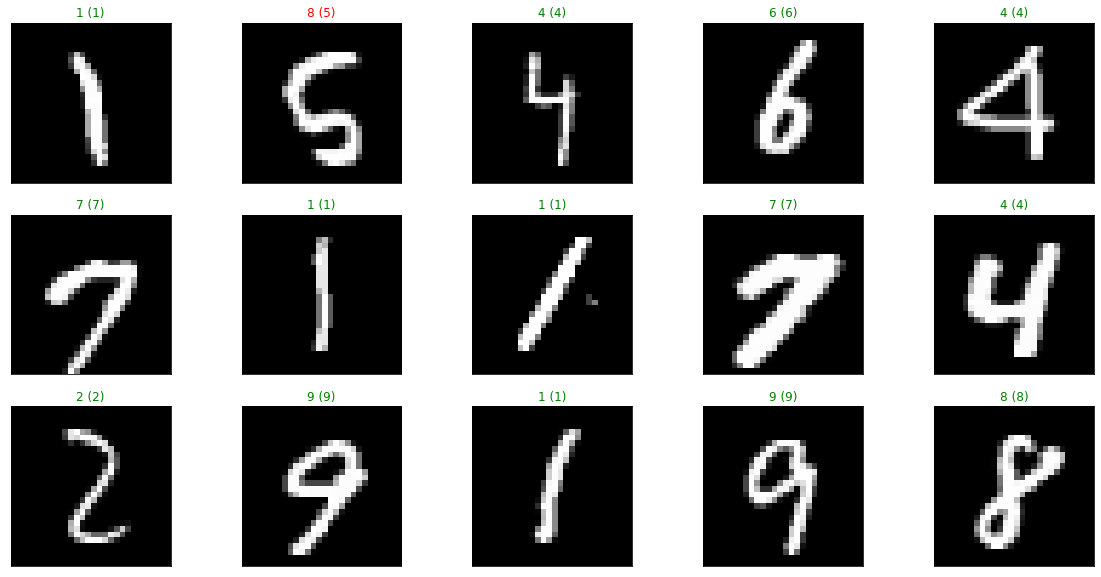

In [39]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x_re.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x_re[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 3718
다음 그림은 숫자 4 입니다.
모델의 예측 : 9
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  6.  0.  0.  2.  1. 87.]
틀렸어요


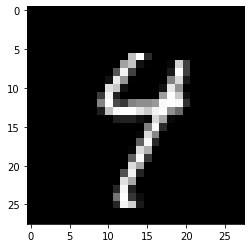

In [40]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x_re[id].reshape([28,-1]), cmap='gray')
plt.show()

In [41]:
model.evaluate(test_x_re, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2669 - accuracy: 0.9261


[0.2668733298778534, 0.9261000156402588]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [42]:
#########################
# 모델링 II : .fit( ) 까지!
#########################

# 1. 세션 초기화
keras.backend.clear_session()

# 2. 모델 생성
model = keras.models.Sequential()

# 3. 모델 쌓기
model.add(keras.layers.Input(shape=((28, 28))))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# 4. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

In [45]:
es = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0,
    verbose=1,
    restore_best_weights=True
)

In [47]:
model.fit(train_x, train_y, epochs=50, validation_split=0.2, callbacks=[es])

Epoch 1/50
1500/1500 [==============================] - 8s 4ms/step - loss: 1.0563 - accuracy: 0.8864 - val_loss: 0.3333 - val_accuracy: 0.9185
Epoch 2/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2152 - accuracy: 0.9430 - val_loss: 0.2422 - val_accuracy: 0.9373
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1619 - accuracy: 0.9549 - val_loss: 0.1748 - val_accuracy: 0.9544
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1441 - accuracy: 0.9600 - val_loss: 0.1850 - val_accuracy: 0.9518
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1197 - accuracy: 0.9661 - val_loss: 0.1425 - val_accuracy: 0.9630
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1114 - accuracy: 0.9691 - val_loss: 0.1508 - val_accuracy: 0.9597
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1052 - accuracy: 0.9722 - val_loss: 0.1772 - val_accuracy:

In [48]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 96.95%
테스트 정확도 : 96.06%


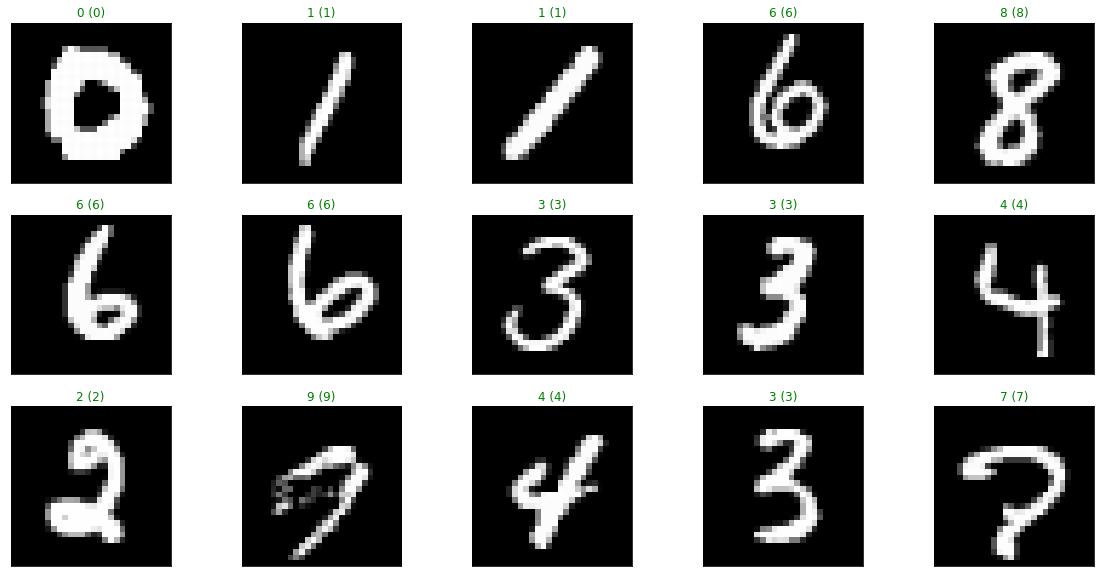

In [49]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 264
다음 그림은 숫자 9 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 80.  0.  0.  0.  0. 17.]
틀렸어요


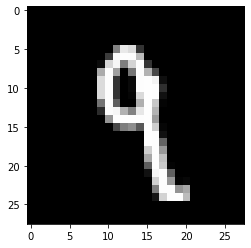

In [54]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [55]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.1459 - accuracy: 0.9606


[0.14588616788387299, 0.9606000185012817]